<a href="https://colab.research.google.com/github/lflambert/ethereum/blob/master/EthereumTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'



Time Series Analysis of Ethereum from May 27 2016 - September 27 2019

---



In [0]:
from google.colab import files
uploaded = files.upload()

Saving Coinbase_ETHUSD_d.csv to Coinbase_ETHUSD_d (10).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Coinbase_ETHUSD_d.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2016-05-27,ETHUSD,11.98,11.98,10.25,11.25,13749.03,151147.98
1,2016-05-28,ETHUSD,11.25,12.44,10.70,11.93,15810.34,180822.02
2,2016-05-29,ETHUSD,11.93,12.49,11.65,12.34,3481.30,42228.37
3,2016-05-30,ETHUSD,12.34,12.88,12.00,12.41,4110.59,51655.95
4,2016-05-31,ETHUSD,12.41,14.24,12.37,14.00,5654.91,76994.75


In [0]:
df.tail()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1202,2019-09-23,ETHUSD,211.10,211.60,198.18,200.80,90087.91,18482749.07
1203,2019-09-24,ETHUSD,200.80,202.72,157.75,166.26,397278.56,69877245.20
1204,2019-09-25,ETHUSD,166.26,175.25,162.25,170.00,183524.37,30922350.88
1205,2019-09-26,ETHUSD,170.00,171.00,152.11,165.85,185235.07,30238262.51
1206,2019-09-27,ETHUSD,165.85,177.10,161.19,177.10,92445.57,15382574.58


In [0]:
#List missing data for first five rows
missing_data = df.isnull()
missing_data.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [0]:
# List data with missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Date
False    1207
Name: Date, dtype: int64

Symbol
False    1207
Name: Symbol, dtype: int64

Open
False    1207
Name: Open, dtype: int64

High
False    1207
Name: High, dtype: int64

Low
False    1207
Name: Low, dtype: int64

Close
False    1207
Name: Close, dtype: int64

Volume ETH
False    1207
Name: Volume ETH, dtype: int64

Volume USD
False    1207
Name: Volume USD, dtype: int64



In [0]:
for col in df.columns:
  print(col)

Date
Symbol
Open
High
Low
Close
Volume ETH
Volume USD


In [0]:
df['Date'].min(), df['Date'].max()

('2016-05-27', '2019-09-27')

In [0]:
eth = df.set_index('Date')
eth.index

Index(['2016-05-27', '2016-05-28', '2016-05-29', '2016-05-30', '2016-05-31',
       '2016-06-01', '2016-06-02', '2016-06-03', '2016-06-04', '2016-06-05',
       ...
       '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-21', '2019-09-22',
       '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27'],
      dtype='object', name='Date', length=1207)

In [0]:
y=eth['Close']

In [0]:
y['2019':]

Date
2019-01-01    139.75
2019-01-02    153.50
2019-01-03    147.23
2019-01-04    153.24
2019-01-05    154.21
2019-01-06    155.92
2019-01-07    150.62
2019-01-08    148.97
2019-01-09    149.50
2019-01-10    126.41
2019-01-11    125.83
2019-01-12    124.59
2019-01-13    115.55
2019-01-14    128.37
2019-01-15    120.06
2019-01-16    122.12
2019-01-17    122.55
2019-01-18    119.53
2019-01-19    123.17
2019-01-20    117.43
2019-01-21    115.86
2019-01-22    118.10
2019-01-23    116.55
2019-01-24    116.40
2019-01-25    114.95
2019-01-26    115.01
2019-01-27    111.35
2019-01-28    105.47
2019-01-29    104.02
2019-01-30    107.61
               ...  
2019-08-29    168.82
2019-08-30    168.40
2019-08-31    171.93
2019-09-01    171.29
2019-09-02    178.80
2019-09-03    178.96
2019-09-04    174.82
2019-09-05    174.00
2019-09-06    169.20
2019-09-07    178.08
2019-09-08    181.56
2019-09-09    180.63
2019-09-10    179.64
2019-09-11    178.30
2019-09-12    181.09
2019-09-13    181.65
2019-09-

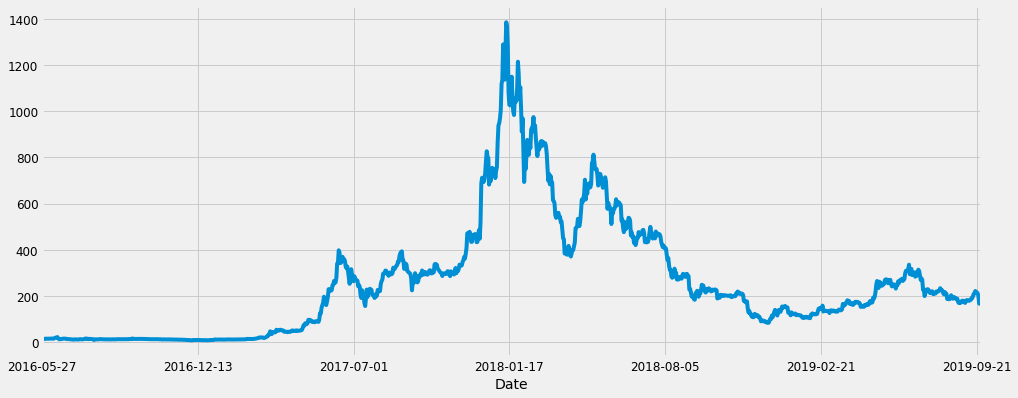

In [0]:
y.plot(figsize=(15, 6))
plt.show()


In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

AttributeError: ignored

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                             order=param,
seasonal_order=param_seasonal,
                                            
enforce_stationarity=False,
                                            
enforce_invertibility=False)

            results= mod.fit()
    
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:17629.789271401365
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:16198.818582798816
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:13983.423457981226


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:13851.354587815953
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:13981.566776505535


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:13965.191620029353
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:13861.505170382687


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:13852.36412484911


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:16034.590476154382


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:14733.329226684586


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:12879.427793621195


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:12755.48830767321


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:12881.914586804553


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:12859.31178894596


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:12775.402505155605


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:12756.103616493088
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:10939.883661345973


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:10838.683610560298
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:11747.074427489682


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:10782.200972872495
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:10847.373781319027


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:10840.100919916797
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:11300.358515721102


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:10782.628030496599
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:10931.281565074038


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:10829.723494023126
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:11739.390151595037


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:10773.614910447719
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:10846.544859354839


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:10831.130296530015


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:11301.064241736953


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:10773.351719619248
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:10948.893965312947


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWa

ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:10862.583014897154
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:11710.800962898642
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:10789.971286713035


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:10848.463972676913


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:10849.380734461487


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:11276.439349187753


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:10790.432123033914
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:10940.185206887389


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWa

ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:10856.501044170895
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:11698.97287972851
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:10781.164740919352


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:10847.542218617782


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:10840.319442764245


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:11274.838452808726


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:10780.920158629751
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:10939.445113695176


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:10837.924909062442
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:11748.22720425294


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:10781.994925812902


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:10838.57886558842


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:10839.335591316496


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:11292.561547709529


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:10781.983186349624
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:10929.110545296684


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:10828.658345864165


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:11741.0520237972


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:10769.739559490761


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:10837.607628902606


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:10830.209253287205


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:11251.290116562574


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10770.012956121735


In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8615      0.037    -23.362      0.000      -0.934      -0.789
ma.L1          0.9051      0.032     28.067      0.000       0.842       0.968
ar.S.L12      -0.0361      0.013     -2.691      0.007      -0.062      -0.010
ma.S.L12      -1.0000     45.089     -0.022      0.982     -89.372      87.372
sigma2       512.5407   2.31e+04      0.022      0.982   -4.48e+04    4.58e+04


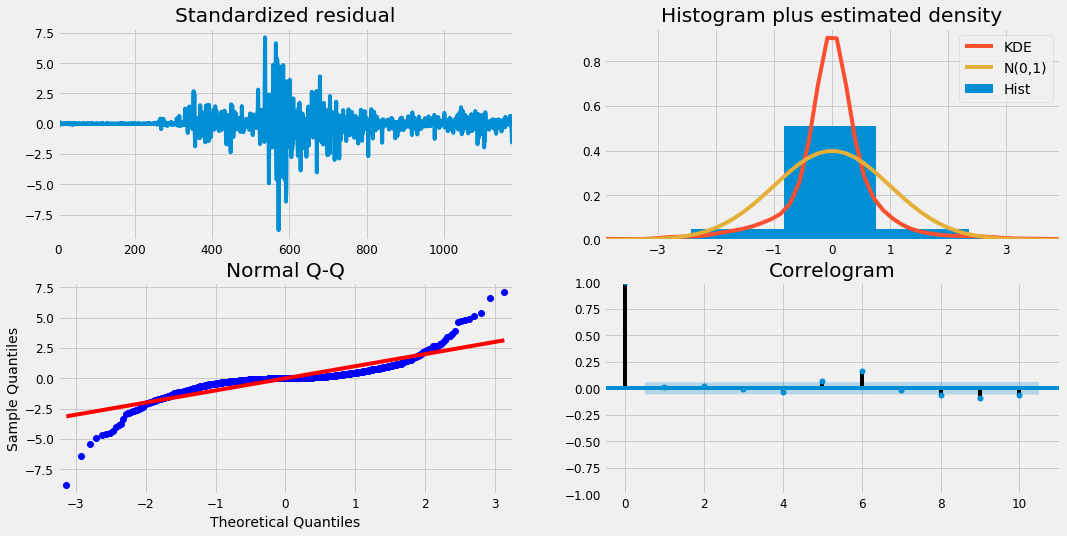

In [0]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2019-02-21'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()

KeyError: ignored

In [0]:
df2=eth
df2.reset_index(inplace=True)
#Prophet requires colums ds (Date) and y (value)
df2 = df2.rename(columns={'Date': 'ds', 'Close': 'y'})

df2.head()

,ds,Symbol,Open,High,Low,y,Volume ETH,Volume USD
0,2016-05-27,ETHUSD,11.98,11.98,10.25,11.25,13749.03,151147.98
1,2016-05-28,ETHUSD,11.25,12.44,10.70,11.93,15810.34,180822.02
2,2016-05-29,ETHUSD,11.93,12.49,11.65,12.34,3481.30,42228.37
3,2016-05-30,ETHUSD,12.34,12.88,12.00,12.41,4110.59,51655.95
4,2016-05-31,ETHUSD,12.41,14.24,12.37,14.00,5654.91,76994.75


In [0]:
#Use Facebook Prophet for predictions

from fbprophet import Prophet
import fbprophet

In [0]:
#Make the prophet model and fit on the data
df2_prophet = fbprophet.Prophet(changepoint_prior_scale=0.10)
df2_prophet.fit(df2)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
#Make a future dataframe for 2 months
df2_forecast = df2_prophet.make_future_dataframe(periods=30*2, freq='D')
#Make predictions
df2_forecast = df2_prophet.predict(df2_forecast)

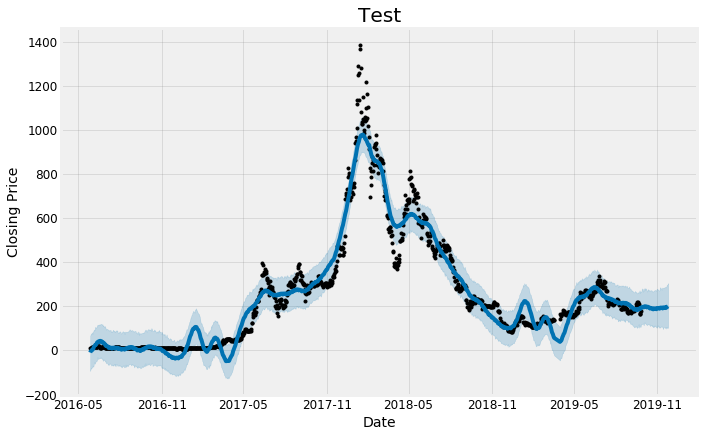

In [0]:
df2_prophet.plot(df2_forecast, xlabel = 'Date', ylabel = 'Closing Price')
plt.title('Test');

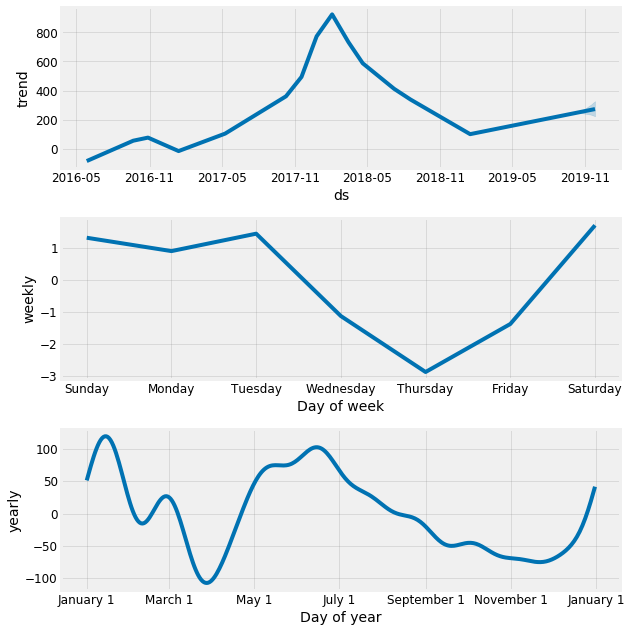

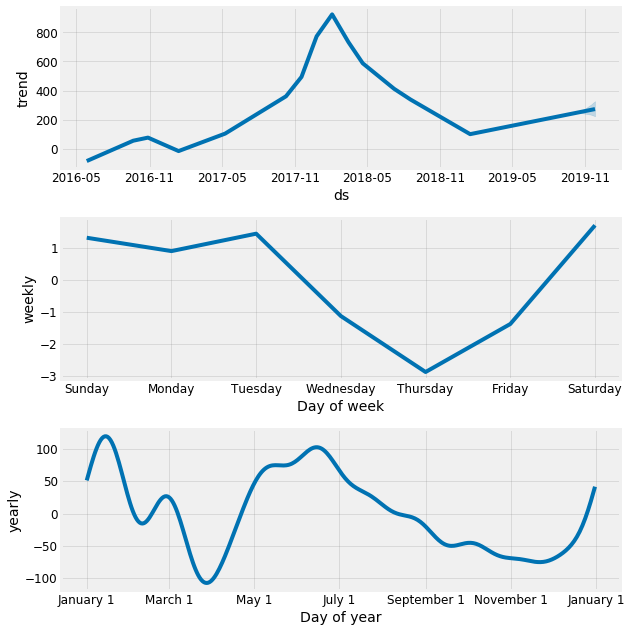

In [0]:
#Plot the trends and Patterns
df2_prophet.plot_components(df2_forecast)

Predict ETH price Using Long Short_term Memory recurrent neural network (LSTM)

In [0]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
df.head()


,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2016-05-27,ETHUSD,11.98,11.98,10.25,11.25,13749.03,151147.98
1,2016-05-28,ETHUSD,11.25,12.44,10.70,11.93,15810.34,180822.02
2,2016-05-29,ETHUSD,11.93,12.49,11.65,12.34,3481.30,42228.37
3,2016-05-30,ETHUSD,12.34,12.88,12.00,12.41,4110.59,51655.95
4,2016-05-31,ETHUSD,12.41,14.24,12.37,14.00,5654.91,76994.75


In [0]:
# creating an array with closing prices
trainingd = df.iloc[:,5:6].values

In [0]:
#normalizing values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(trainingd)

In [0]:
##x_train stores the values of closing prices of past 45(or as specified in ##timestamp) days

##y_train stores the values of closing prices of the present day


In [0]:
x_train = []
y_train = []
timestamp = 45
length = len(trainingd)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])


In [0]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [0]:
print (x_train[0])
print ('\n')
print (y_train[0])


[0.00330595 0.00379895 0.00409619 0.00414694 0.00529967 0.00524893
 0.00531417 0.00521268 0.00516193 0.00532867 0.00545917 0.00577092
 0.00574192 0.00581442 0.00537942 0.00537217 0.00667715 0.00812713
 0.00870713 0.00862013 0.01043985 0.00656841 0.00352345 0.00411069
 0.0037047  0.00442969 0.00482843 0.00520543 0.00567667 0.00558242
 0.00532867 0.00535042 0.00397294 0.00443694 0.00420494 0.00406719
 0.00396569 0.00384245 0.00343645 0.00276221 0.00282746 0.00245771
 0.0032842  0.00312471 0.00313921]


0.0028927087788998994


In [0]:
#Prepare the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1162, 45, 1)

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [0]:
model = Sequential() #define the Keras model


In [0]:
model.add(LSTM(units = 120, return_sequences = True, input_shape = (x_train.shape[1], 1))) #120 neurons in the hidden layer
##return_sequences=True makes LSTM layer to return the full history including outputs at all times
model.add(Dropout(0.2))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:

model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, return_sequences = False)) 
model.add(Dropout(0.2))

model.add(Dense(units = 1)) #output
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = 25, batch_size = 32)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/25
1162/1162 [==============================] - 12s 10ms/step - loss: 0.0131
Epoch 2/25
1162/1162 [==============================] - 9s 8ms/step - loss: 0.0035
Epoch 3/25
1162/1162 [==============================] - 9s 7ms/step - loss: 0.0032
Epoch 4/25
1162/1162 [==============================] - 9s 8ms/step - loss: 0.0034
Epoch 5/25
1162/1162 [==============================] - 9s 8ms/step - loss: 0.0023
Epoch 6/25
1162/1162 [==============================] - 9s 8ms/step - loss: 0.0021
Epoch 7/25
1162/1162 [==============================] - 9s 8ms/step - loss: 0.0023
Epoch 8/25
1162/1162 [==============================] - 9s 7ms/step - loss: 0.0021
Epoch 9/25
1162/1162 [==============================] - 9s 7ms/step - loss: 0.0022
Epoch 10/25
1162/1162 [==============================] - 9s 8ms/step - loss: 0.0021
Epoch 11/25
1162/1162 [==============================] - 9s 8ms/step - loss: 0.0017
Epoch 12/25
1162/1162 [==============================] - 9s 8ms/step - loss: 0.0016

NameError: ignored